In [1]:
# Setup code for the notebook
#%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import ipytools
import data_loader
import visualization

# Get test datas

In [3]:
images_name = [
    '../testdata/input_pair/img_01.tif',
    '../testdata/input_pair/img_02.tif'
]

In [4]:
rpc_name = [
    '../testdata/input_pair/rpc_01.xml',
    '../testdata/input_pair/rpc_02.xml'
]

In [5]:
roi = {
"x": 150,
"y": 150,
"w": 700,
"h": 700
}

In [6]:
tile_size = 300

# Get images from the video 

In [269]:
folders = data_loader.retrieve_video()

892 images


In [270]:
# Chose a pair of images
i, j = 0, 100
images_name = data_loader.choose_video(folders, [i, j])

In [271]:
images_name

['../data/s02_20150507T020554Z/video_frames/s02_20150507T02055427Z.tif',
 '../data/s02_20150507T020554Z/video_frames/s02_20150507T02055760Z.tif']

In [272]:
roi = {
    "x": 0,
    "y": 0,
    "w": 1000,
    "h": 1000
  }

In [273]:
tile_size = 1000
rpc_name = []

# Get Triplets

In [182]:
folders = data_loader.retrieve_triplets()

In [183]:
# Chose a pair of images
d = 2
i = 9
indices = ['1107', '1148']#, '1231']
images_name = data_loader.choose_triplets(folders, d, i, indices)

In [184]:
roi = {
    "x": 0,
    "y": 0,
    "w": 1000,
    "h": 1000
  }

In [185]:
tile_size = 1000
rpc_name = []

# Visualize chosen images

Dimension:  (1024, 1024, 1)
Dimension:  (1102, 1031, 1)



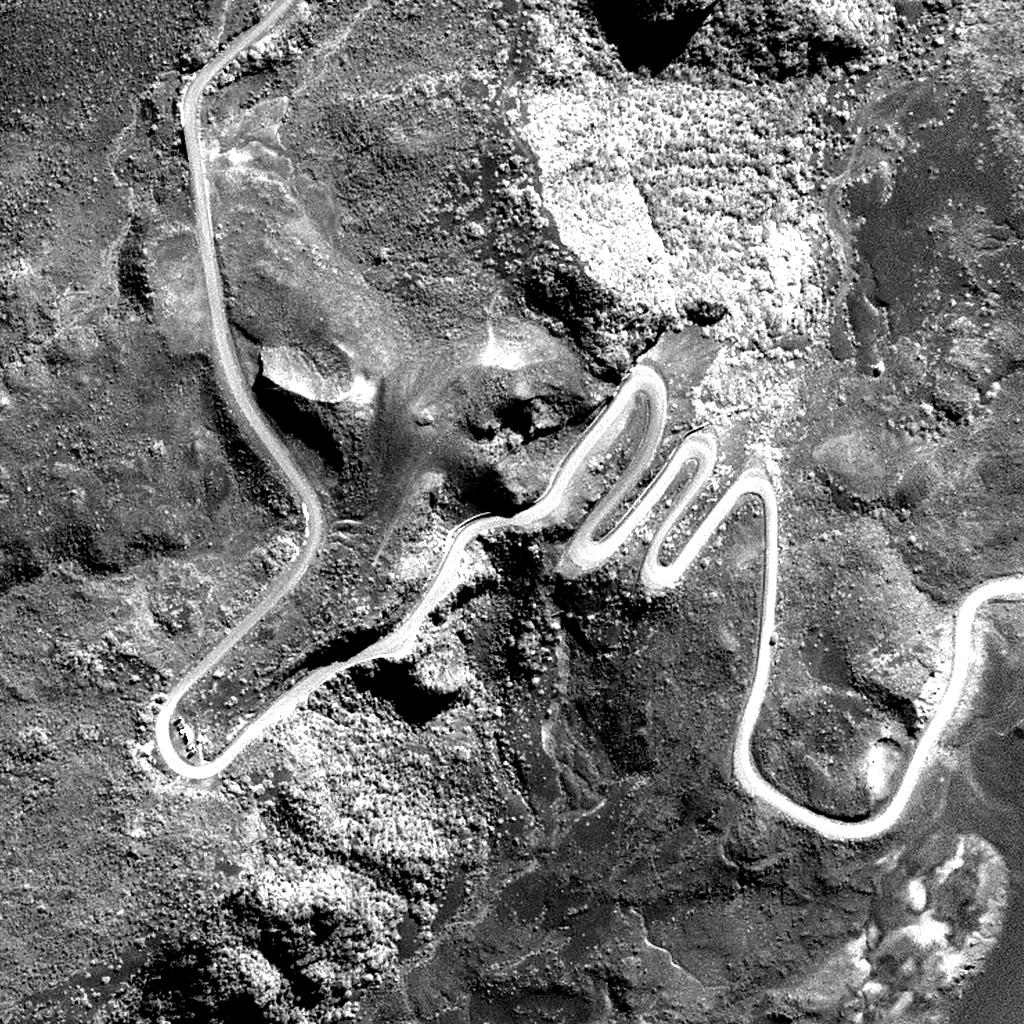
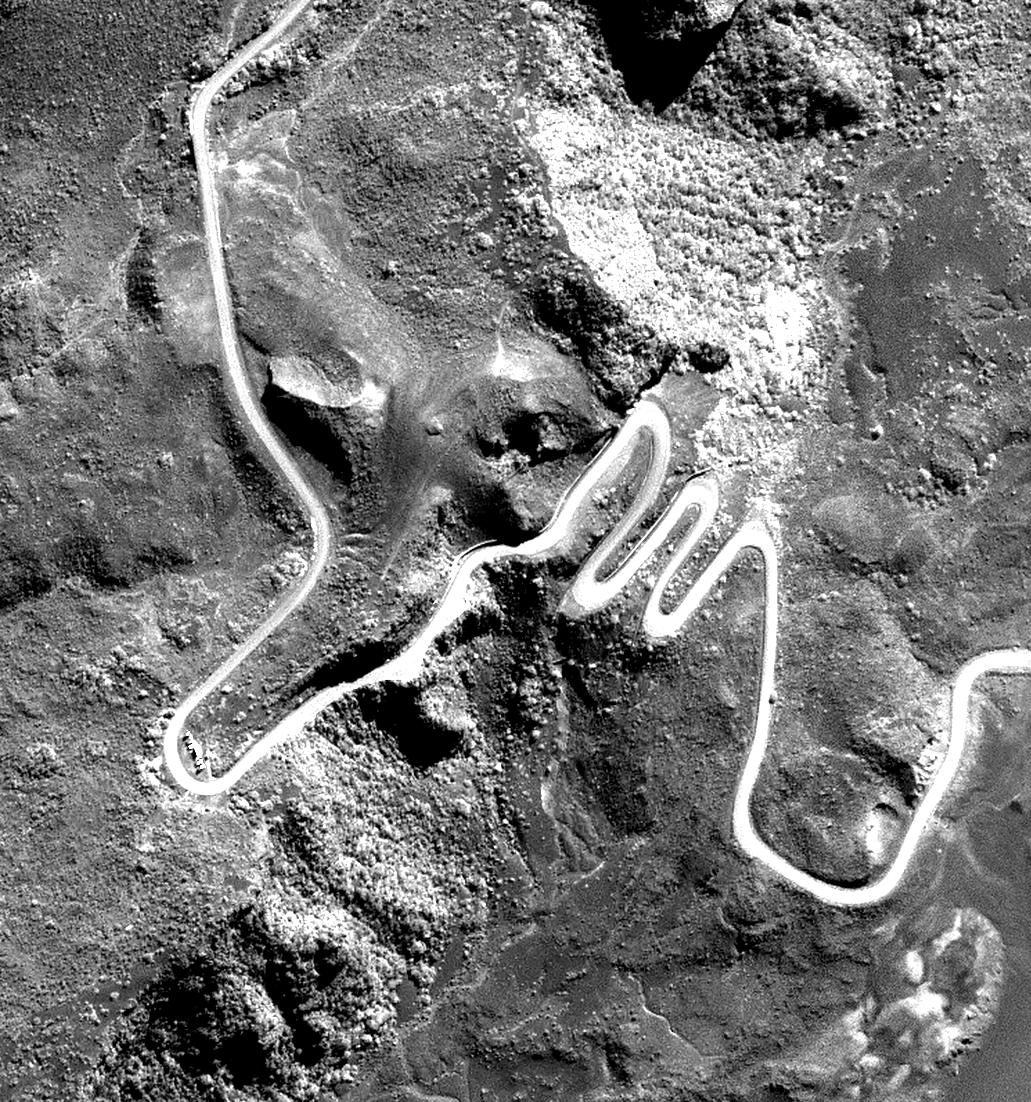

In [7]:
data_loader.display_images(images_name)

Dimension:  (700, 700, 1)
Dimension:  (700, 700, 1)



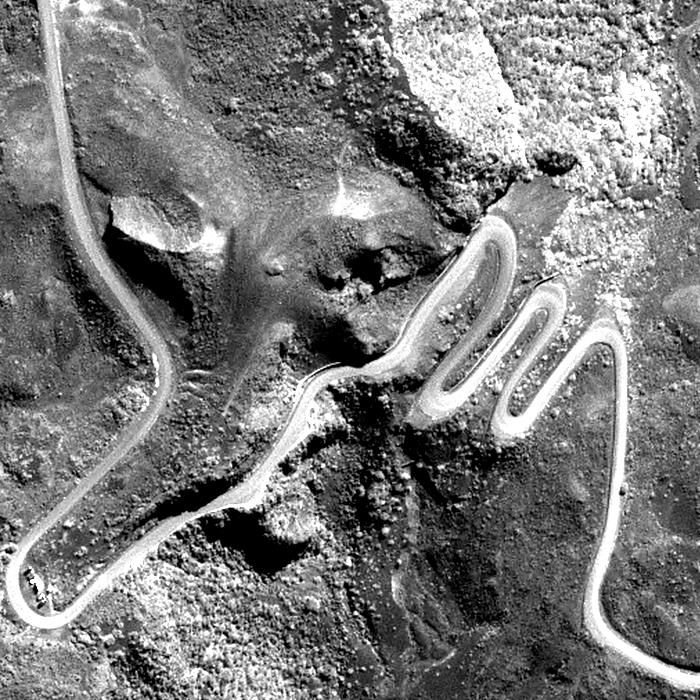
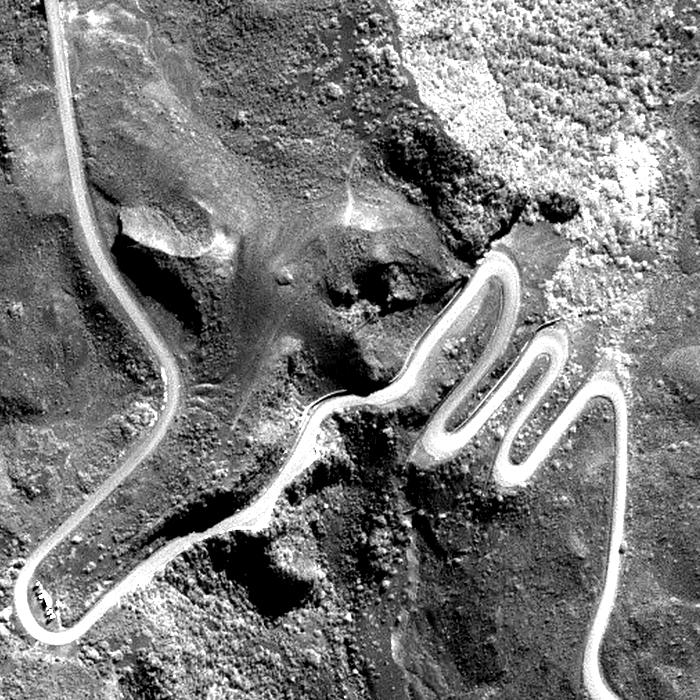

In [8]:
data_loader.display_images(images_name, roi)

# Compare optimizations

In [26]:
# from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm
import numpy as np
def compare(images_name, tile_size=tile_size, roi=None, rpc_name=[]):
    A_list = []
    init_scores = []
    corrected_scores = []
    for i in tqdm([0, 1, 2]):#, 5]):
        # Write JSON
        data_loader.write_json(images_name, tile_size=tile_size, num_variable=i, roi=roi, rpc_name=rpc_name)
        # Excute s2P
#         !rm yaw_extension/test.txt &> /dev/null
        !rm -rf output && cd .. && python3 s2p.py yaw_extension/config.json &> yaw_extension/test.txt
        # tiles path
        tiles_path = visualization.get_tiles_path()
        A_paths = []
        init_scores_path = []
        corrected_scores_paths = []
        for j in range(len(tiles_path)):
            tile_path = tiles_path[j]
            # Retrieves transformation matrix 
            m = visualization.get_matches(tile_path)
            F = visualization.get_affine_fundamental_matrix(tile_path)
            A = visualization.get_correction_matrix(tile_path)
            A_paths.append(A)
            # Compute errors 
            e_2, e_3 = visualization.visualize_pointing_error(F, m, A, plot=False)
            init_scores_path.append(e_2)
            corrected_scores_paths.append(e_3)
        A_list.append(A_paths)
        init_scores.append(init_scores_path)
        corrected_scores.append(corrected_scores_paths)
    return A_list, np.array(init_scores), np.array(corrected_scores)

In [27]:
A_list, init_scores, corrected_scores = compare(images_name, tile_size=tile_size, roi=roi, rpc_name=rpc_name)

100%|██████████| 3/3 [01:06<00:00, 22.13s/it]


In [28]:
m1 = np.array([1, 2])
m1

array([1, 2])

In [23]:
init_scores

array([[150.56489171, 280.47400423, 210.24725497, 109.68071924],
       [150.56489171, 280.47400423, 210.24725497, 109.68071924],
       [150.56489171, 280.47400423, 210.24725497, 109.68071924]])

In [24]:
np.array(corrected_scores)

array([[31.33513875, 57.46769948, 53.3049183 , 28.09707327],
       [31.33513875, 57.46769948, 53.3049183 , 28.09707327],
       [31.39227702, 67.89041281, 52.84974553, 27.21102257]])

In [25]:
A_list

[[array([[1.        , 0.        , 0.74202282],
         [0.        , 1.        , 0.15736924],
         [0.        , 0.        , 1.        ]]),
  array([[1.        , 0.        , 0.71609813],
         [0.        , 1.        , 0.15186565],
         [0.        , 0.        , 1.        ]]),
  array([[1.        , 0.        , 0.69171557],
         [0.        , 1.        , 0.14674233],
         [0.        , 0.        , 1.        ]]),
  array([[1.        , 0.        , 0.628677  ],
         [0.        , 1.        , 0.13336439],
         [0.        , 0.        , 1.        ]])],
 [array([[1.        , 0.        , 0.74202282],
         [0.        , 1.        , 0.15736924],
         [0.        , 0.        , 1.        ]]),
  array([[1.        , 0.        , 0.71609813],
         [0.        , 1.        , 0.15186565],
         [0.        , 0.        , 1.        ]]),
  array([[1.        , 0.        , 0.69392671],
         [0.        , 1.        , 0.14721141],
         [0.        , 0.        , 1.        ]])

# Execution of s2p on Plantet's data

In [9]:
data_loader.write_json(images_name, opti_method='analytic', num_variable=2, tile_size=tile_size, roi=roi, rpc_name=rpc_name)

In [26]:
!rm -rf output && cd .. && python3 s2p.py yaw_extension/config.json

out_dir is: /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output
tile size: 350 350
total number of tiles: 4 (2 x 2)

discarding masked tiles...
done 1 / 4 tildone 2 / 4 tildone 3 / 4 tildone 4 / 4 tiles
Elapsed time: 0:00:00.122135

correcting pointing locally...
correcting pointing on tile 150 150 pair 1...

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_01.tif 150 150 350 350 --thresh-dog 0.013300 -o /tmp/s2p_mu0ti67v.txt
0:00:00.316557

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_02.tif -99 30 635 1707 --thresh-dog 0.013300 -o /tmp/s2p_qaqe8dka.txt
0:00:01.632424

RUN: matching /tmp/s2p_mu0ti67v.txt /tmp/s2p_qaqe8dka.txt -relative 0.600000 -o /tmp/s2p_ehf__ejw.txt -f "-0.6913884926201382 -0.14666768620323314 0.691853988225002 0.14767735463977585 7.726797205383484"
331 matches
0:00:00.748679

RUN: ransac fmn 1000 .3 7 /tmp/s2p_ehf__ejw.txt < /tmp/s2p_ehf__ejw.txt
pmean = 344.543 305.96 353.

Input file size is 1024, 1024
0...10...20...30...40...50...60...70...80...90...100 - done.
0:00:00.049023

RUN: qauto /tmp/s2p_x6tu_5rm.tif /tmp/s2p_5yqg73uo.png
qauto: rminmax = 127 481
0:00:00.021354

RUN: gdal_translate -ot Float32 -co TILED=YES -co BIGTIFF=IF_NEEDED -srcwin 250 36 635 1707 '/Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_02.tif' '/tmp/s2p_4j_za1am.tif'
Input file size is 1031, 1102
Warning 1: -srcwin 250 36 635 1707 falls partially outside raster extent. Going on however.
0...10...20...30...40...50...60...70...80...90...100 - done.
0:00:00.050344

RUN: qauto /tmp/s2p_4j_za1am.tif /tmp/s2p_jr45ipgk.png
qauto: rminmax = 0 381
0:00:00.102685

RUN: cp /tmp/s2p_tsnecg6n.png /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output/tiles/row_0000150_height_350/col_0000500_width_350/pair_1/sift_matches_pointing.png
0:00:00.006432
done 2 / 4 tilcorrecting pointing on tile 150 500 pair 1...

RUN: sift_roi /Users/juleskozolinsky/Projets/s2p/yaw_ex

Input file size is 1024, 1024
0...10...20...30...40...50...60...70...80...90...100 - done.
0:00:00.051654

RUN: qauto /tmp/s2p_i1ad3ttj.tif /tmp/s2p_b700ou8g.png
qauto: rminmax = 129 437
0:00:00.021498

RUN: gdal_translate -ot Float32 -co TILED=YES -co BIGTIFF=IF_NEEDED -srcwin 250 389 635 1707 '/Users/juleskozolinsky/Projets/s2p/yaw_extension/../testdata/input_pair/img_02.tif' '/tmp/s2p_rslcmgzu.tif'
Input file size is 1031, 1102
Warning 1: -srcwin 250 389 635 1707 falls partially outside raster extent. Going on however.
0...10...20...30...40...50...60...70...80...90...100 - done.
0:00:00.054528

RUN: qauto /tmp/s2p_rslcmgzu.tif /tmp/s2p_kivblqs_.png
qauto: rminmax = 0 367
0:00:00.079117

RUN: cp /tmp/s2p_rsvm_7o8.png /Users/juleskozolinsky/Projets/s2p/yaw_extension/./output/tiles/row_0000500_height_350/col_0000500_width_350/pair_1/sift_matches_pointing.png
0:00:00.006619
done 4 / 4 tiles
Elapsed time: 0:00:15.715496



In [59]:
tiles_path = visualization.get_tiles_path()
print(tiles_path)
tile_path = tiles_path[0]

['./output/tiles/row_0000500_height_350/col_0000500_width_350/pair_1', './output/tiles/row_0000500_height_350/col_0000150_width_350/pair_1', './output/tiles/row_0000150_height_350/col_0000500_width_350/pair_1', './output/tiles/row_0000150_height_350/col_0000150_width_350/pair_1']


# Retrieve computed values

In [60]:
im_list = visualization.get_images()
im1 = im_list[0]
im2 = im_list[1]

../testdata/input_pair/img_01.tif
../testdata/input_pair/img_02.tif


In [61]:
m = visualization.get_matches(tile_path)
F = visualization.get_affine_fundamental_matrix(tile_path)
A = visualization.get_correction_matrix(tile_path)
print(A)

[[   1.           -0.         -169.58291588]
 [   0.            1.          -35.96538219]
 [   0.            0.            1.        ]]


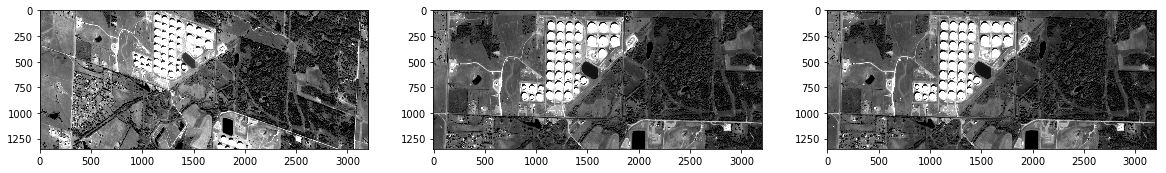

In [210]:
im2_corrected = visualization.visualize_transformation(im1, im2, A)

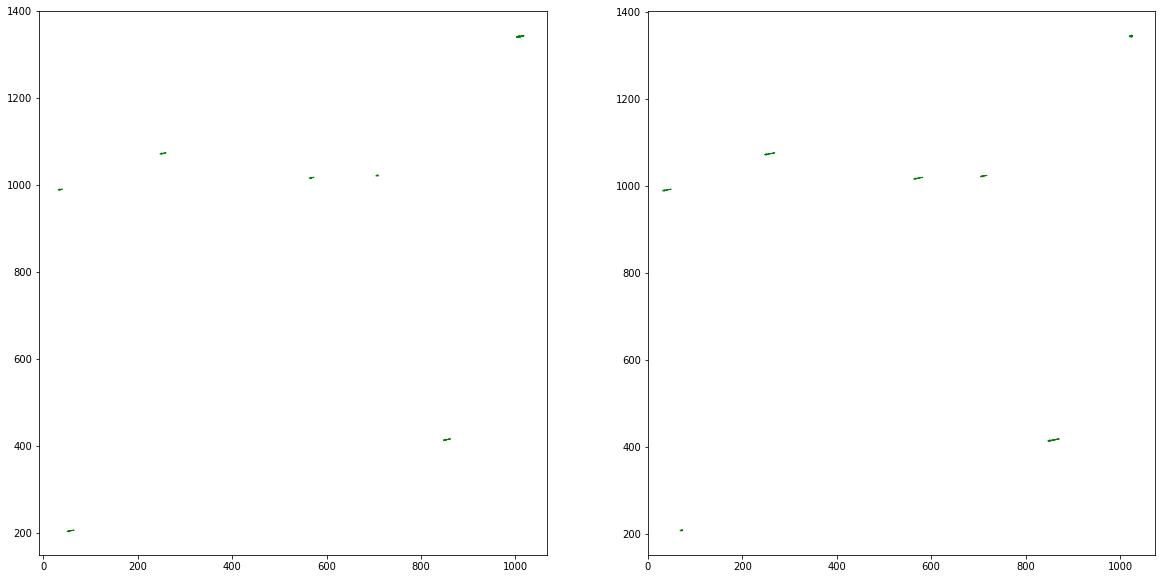

In [211]:
%matplotlib inline
e_2, e_3 = visualization.visualize_pointing_error(F, m, A)

In [212]:
print("error without pointing error correction:", e_2)
print("error with pointing error correction:", e_3)

error without pointing error correction: 186.93189430619398
error with pointing error correction: 110.38704766526044


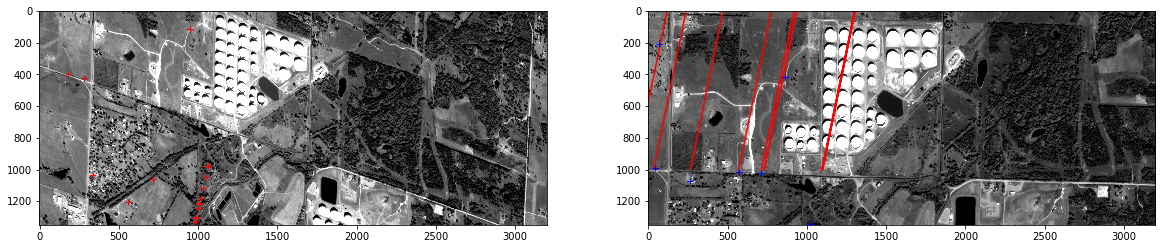

In [213]:
visualization.visualize_epipolar(im1, im2, F, m)

In [69]:
m

array([[692.352, 509.606, 693.897, 557.688],
       [507.553, 518.957, 513.425, 548.167],
       [715.46 , 538.378, 716.281, 590.854],
       [636.226, 543.139, 638.433, 587.719],
       [530.403, 544.411, 535.295, 576.796],
       [625.478, 548.972, 627.853, 591.394],
       [537.52 , 556.048, 541.658, 591.772],
       [610.695, 558.895, 613.265, 599.802],
       [617.368, 559.936, 620.178, 601.951],
       [615.691, 562.683, 618.302, 604.824],
       [550.055, 570.693, 553.437, 610.643],
       [601.082, 570.274, 603.837, 611.54 ],
       [596.663, 583.597, 598.979, 626.717],
       [676.656, 586.611, 677.736, 635.426],
       [619.128, 587.157, 620.967, 633.808],
       [669.923, 588.906, 670.804, 637.591],
       [588.095, 594.019, 590.493, 638.473],
       [619.664, 603.142, 620.985, 651.898],
       [667.72 , 606.219, 668.606, 657.317],
       [667.72 , 606.219, 668.606, 657.317],
       [660.814, 608.289, 661.582, 659.178],
       [562.159, 610.703, 564.149, 657.504],
       [57


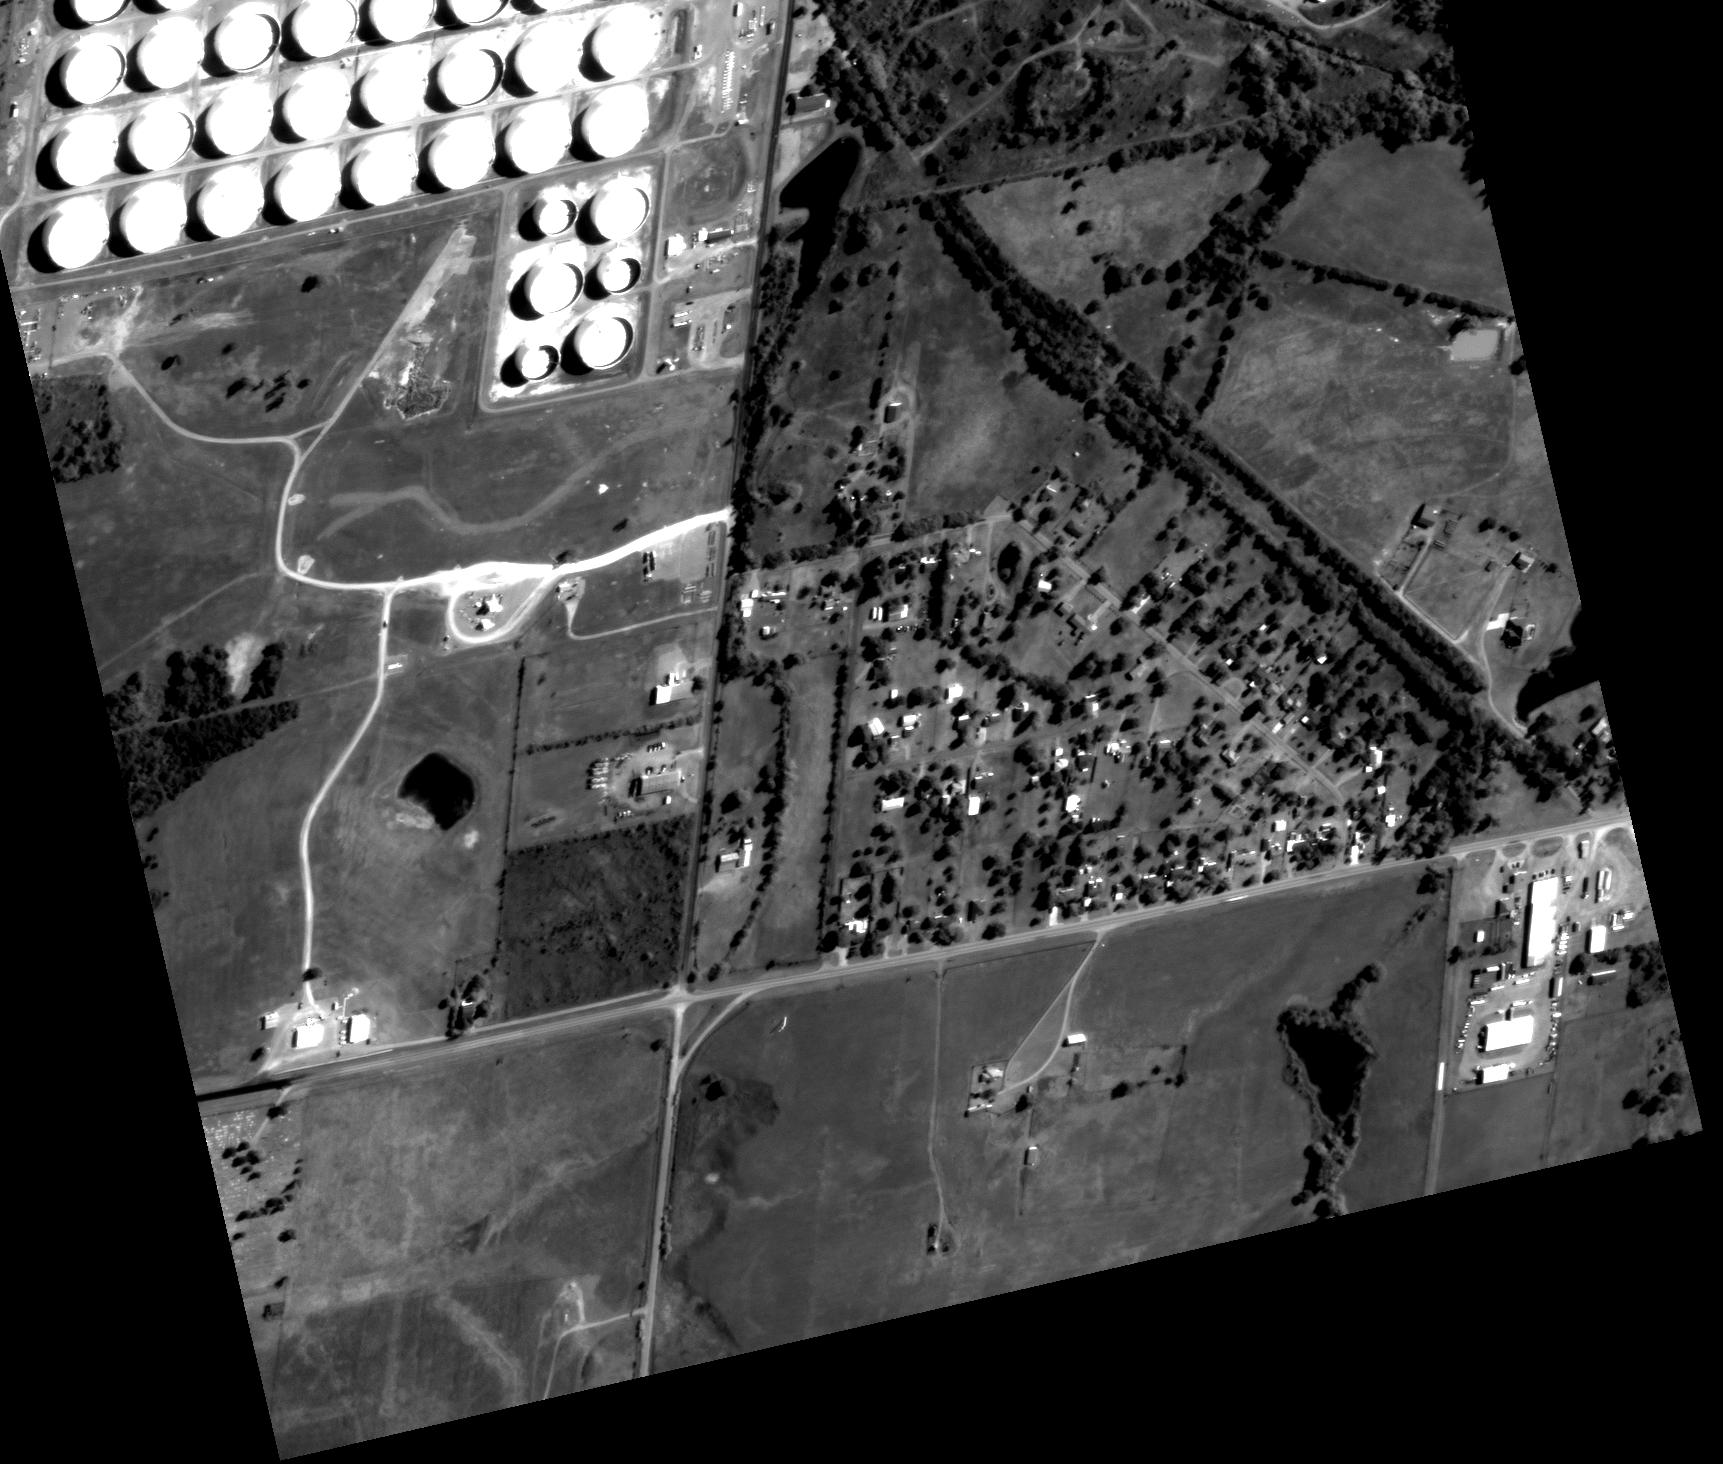
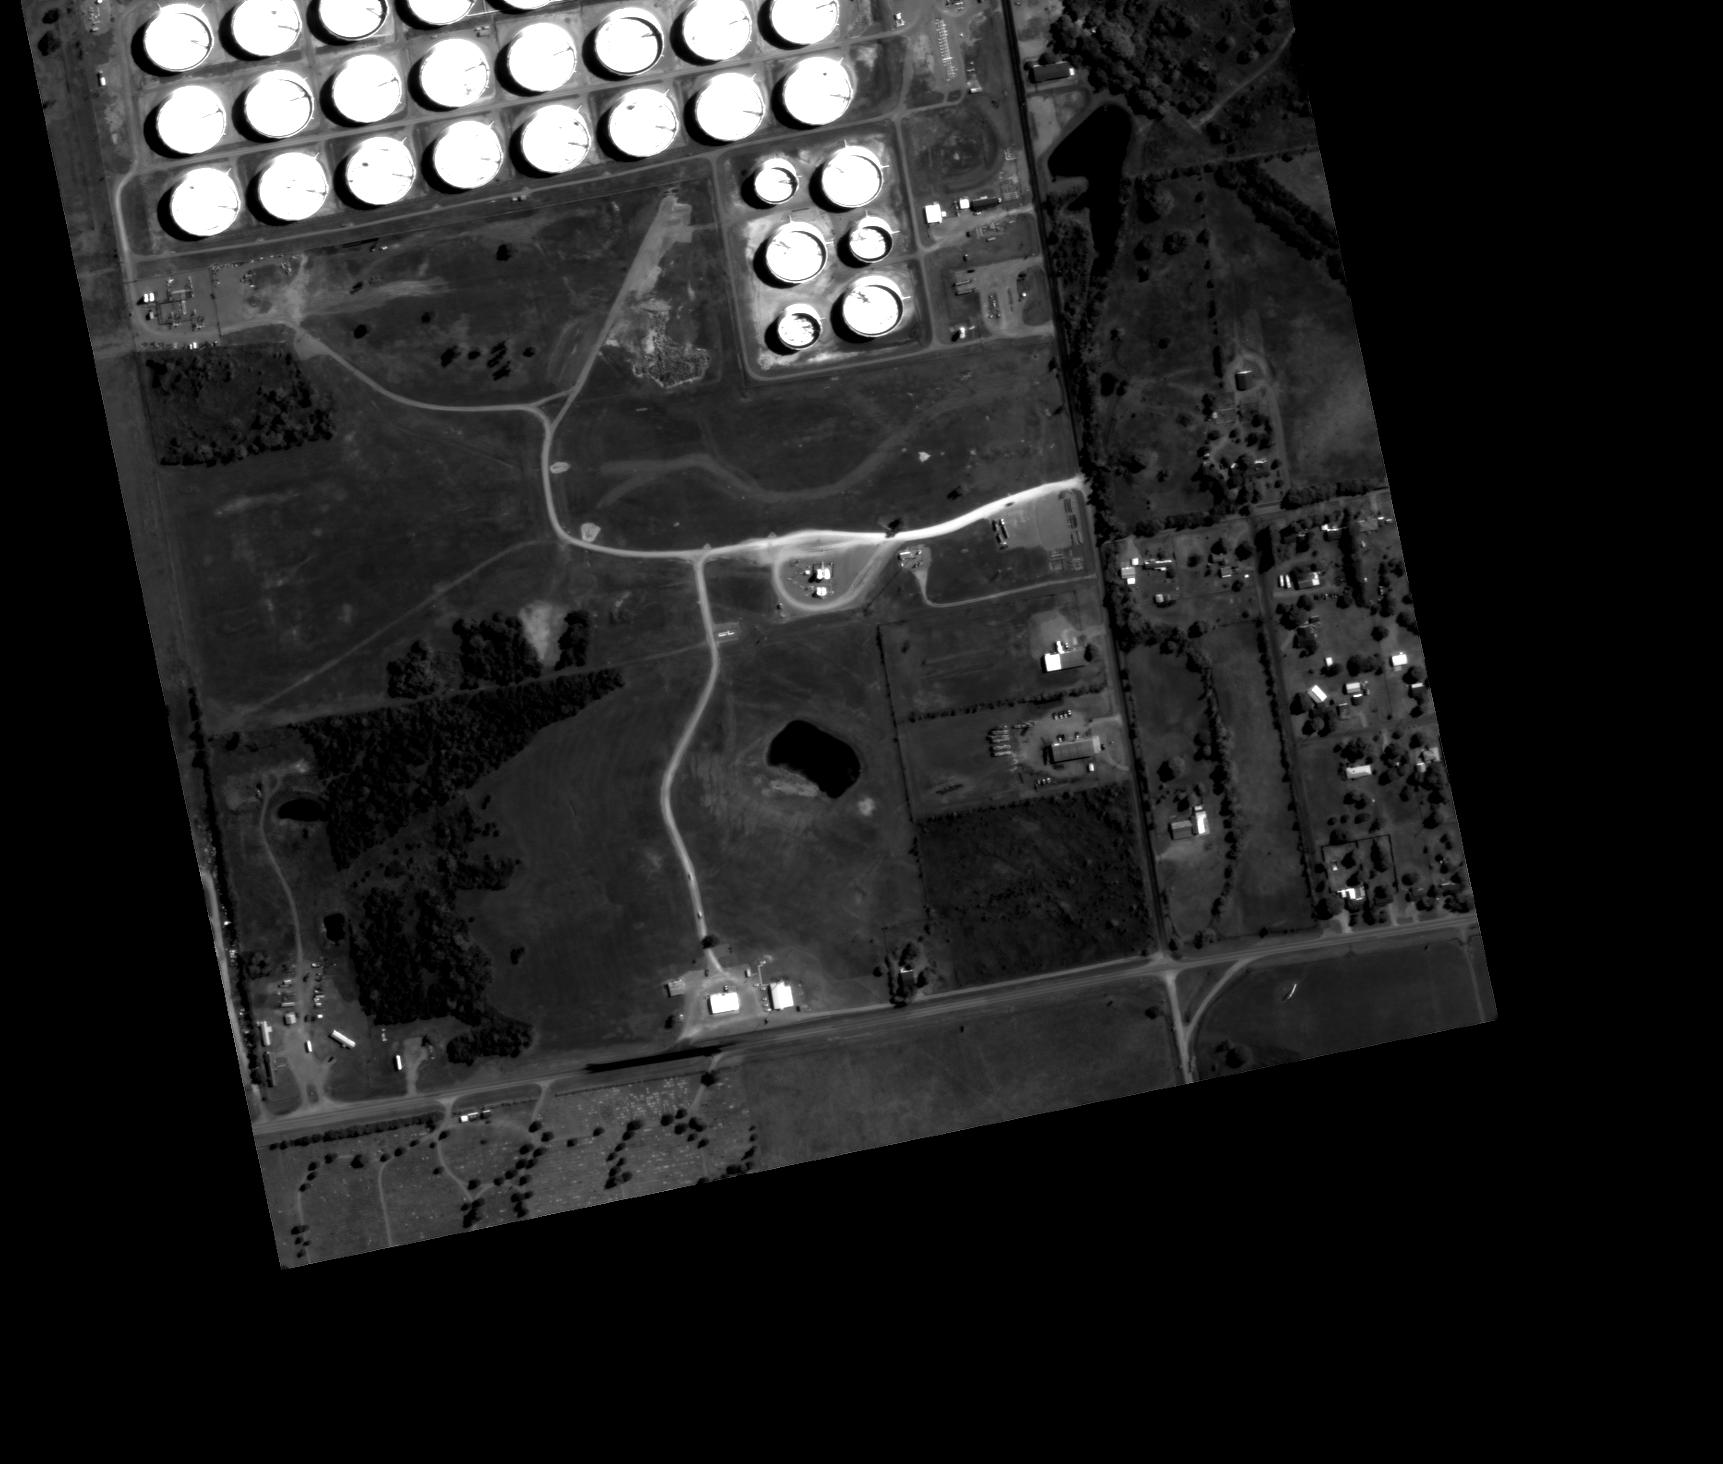

In [214]:
a_ref = tile_path + '/rectified_ref.tif'
a_sec = tile_path + '/rectified_sec.tif'
ipytools.display_gallery([ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)), ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec))])

In [88]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_ref)))

NameError: name 'a_ref' is not defined

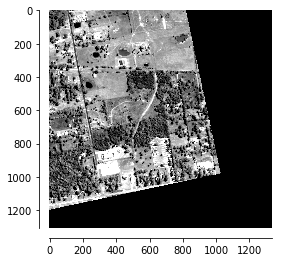

In [220]:
ipytools.display_imshow(ipytools.simple_equalization_8bit(ipytools.readGTIFF(a_sec)))

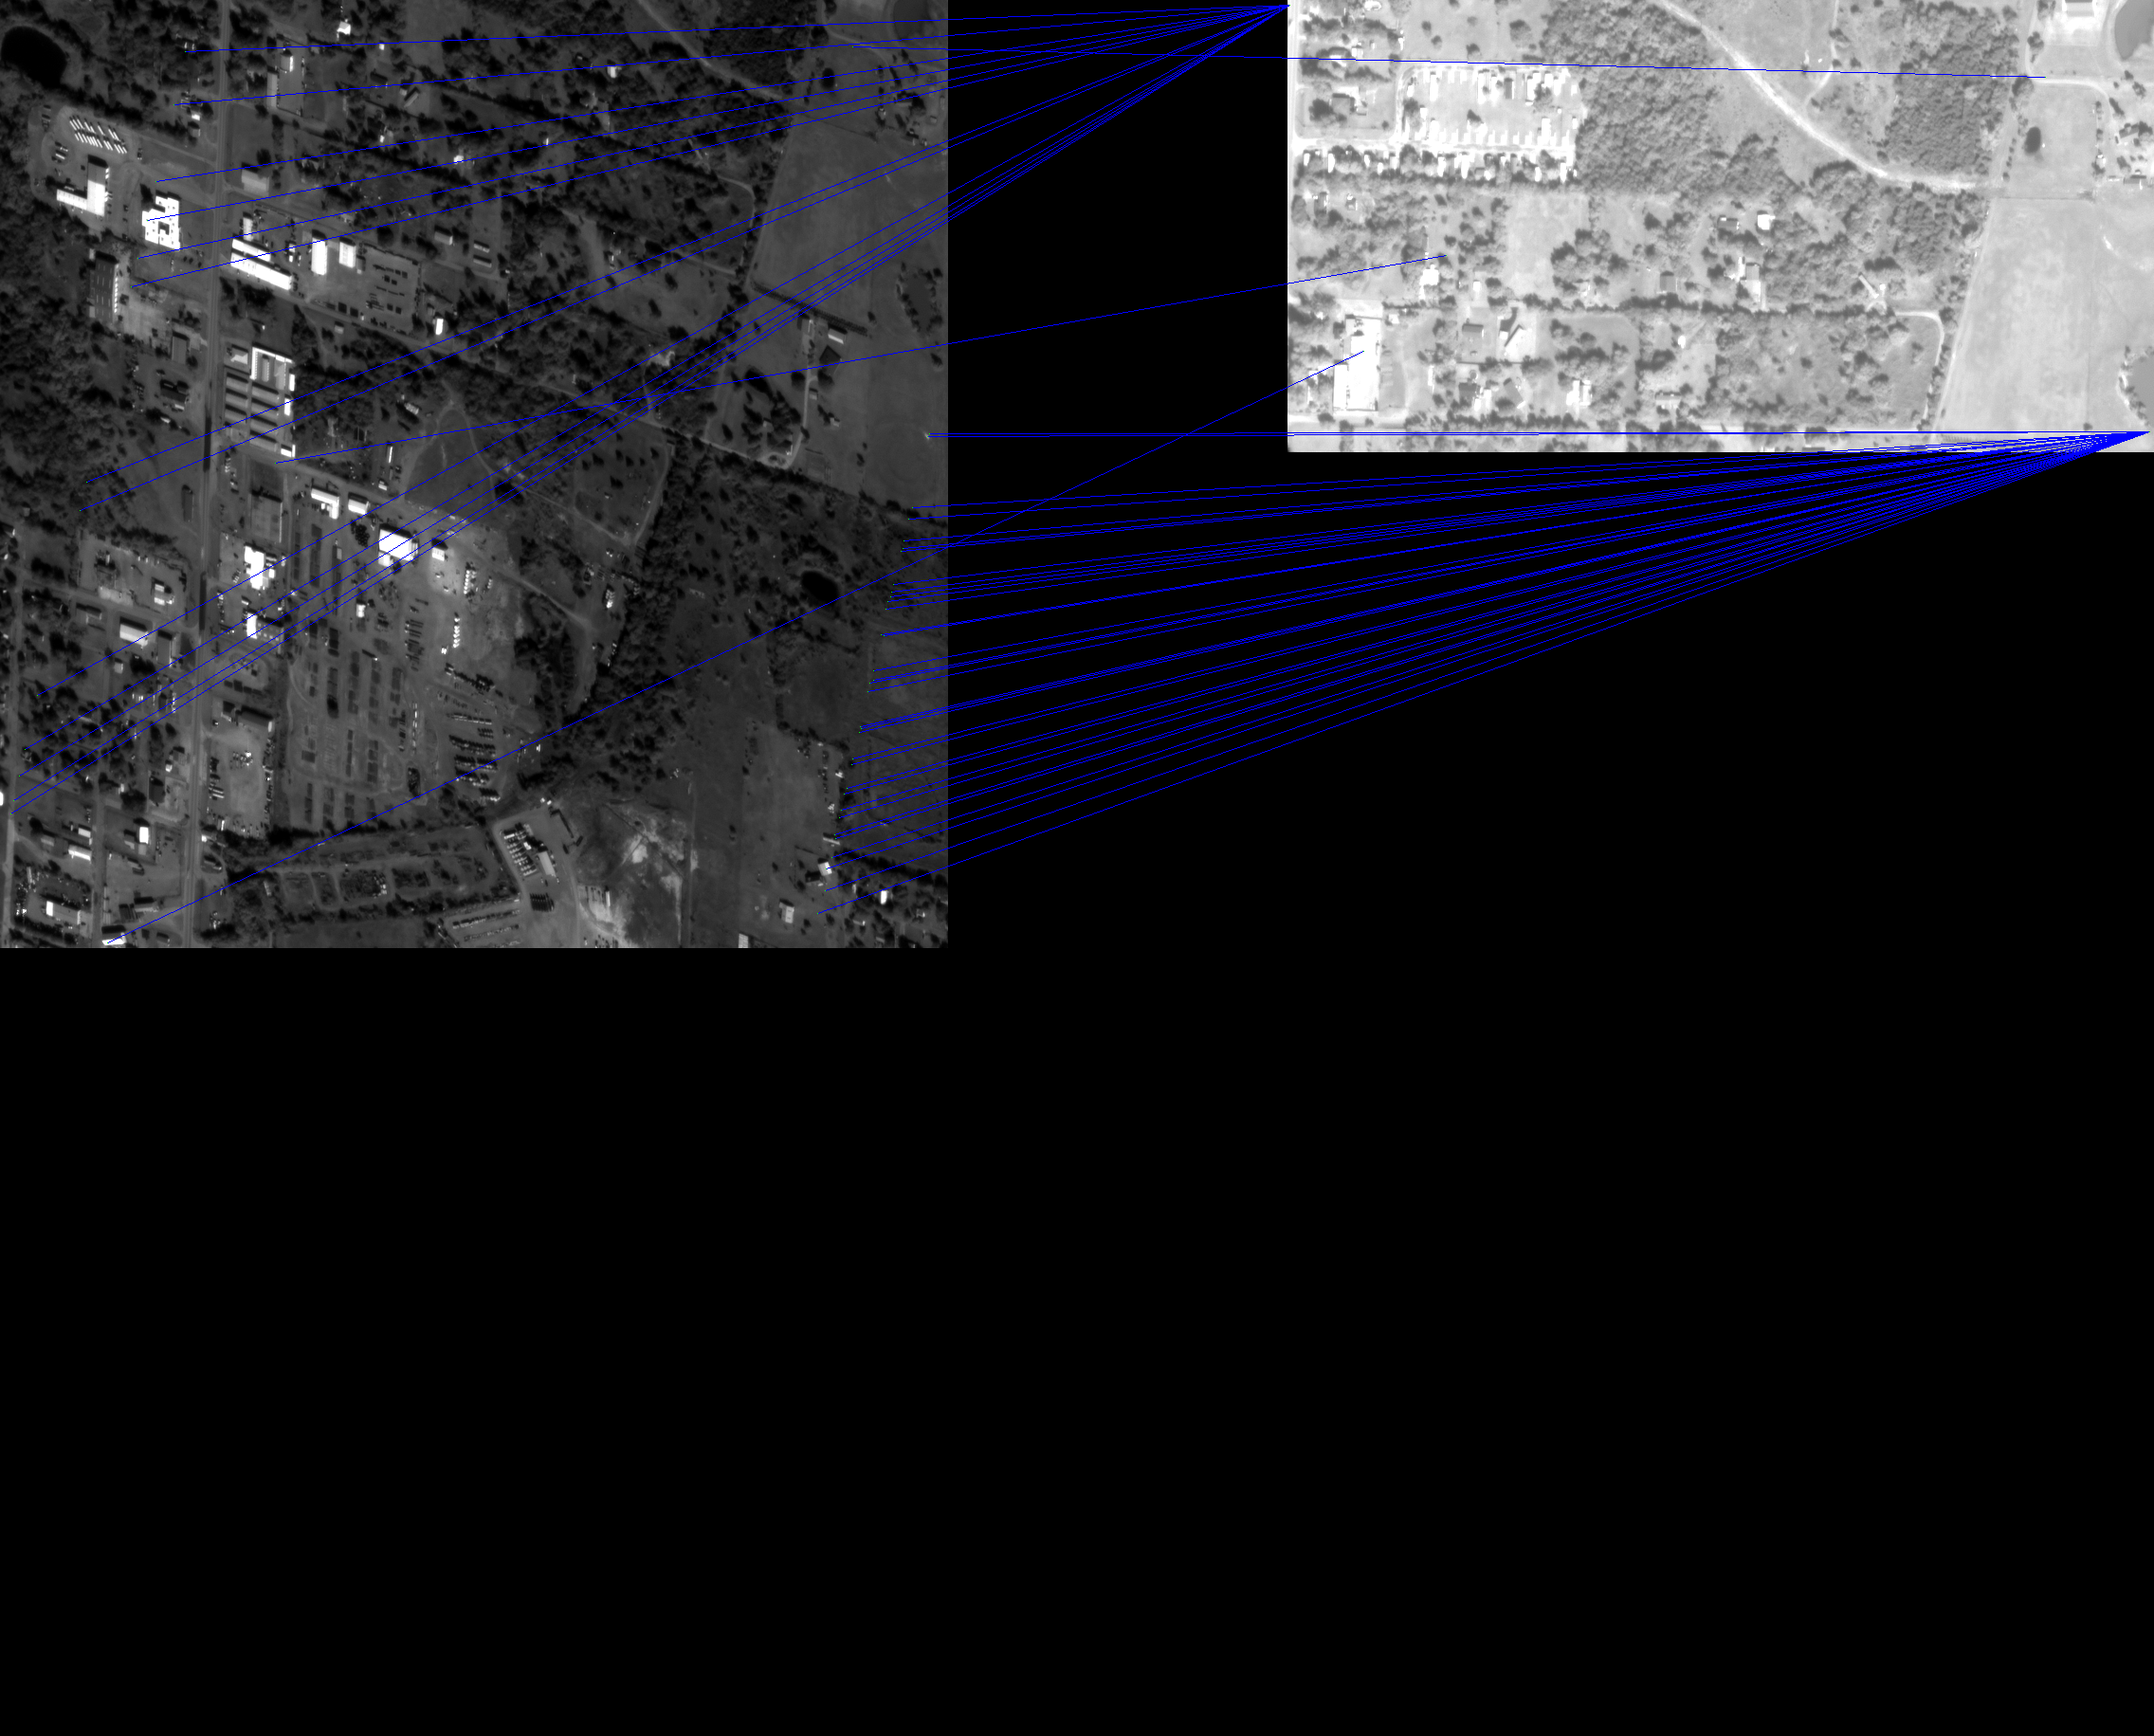

In [221]:
from IPython.display import Image
filename = key + '/sift_matches_pointing.png'
Image(filename=filename) 

In [106]:
expected_output = './output/s03_20161003T161107Z/dsm.tif'
a = readGTIFF(expected_output)

RasterioIOError: ./output/s03_20161003T161107Z/dsm.tif: No such file or directory

<IPython.core.display.Javascript object>


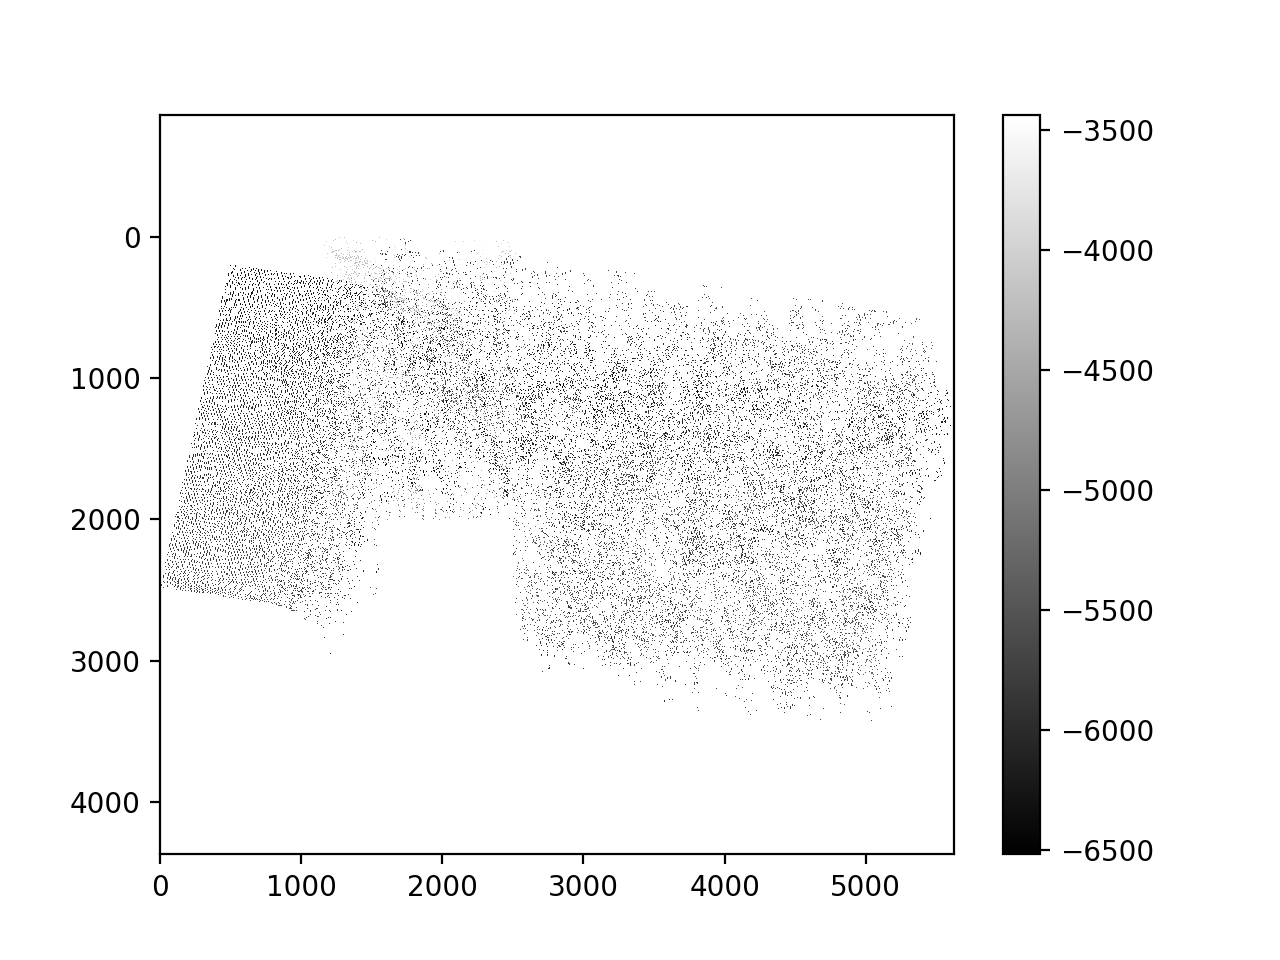

In [18]:
b = a#readGTIFF('/Users/juleskozolinsky/Projets/s2p/yaw_extension/output/s03_20161003T161107Z/tiles/row_0000000_height_500/col_0001000_width_500/dsm.tif')
display_imshow(b)